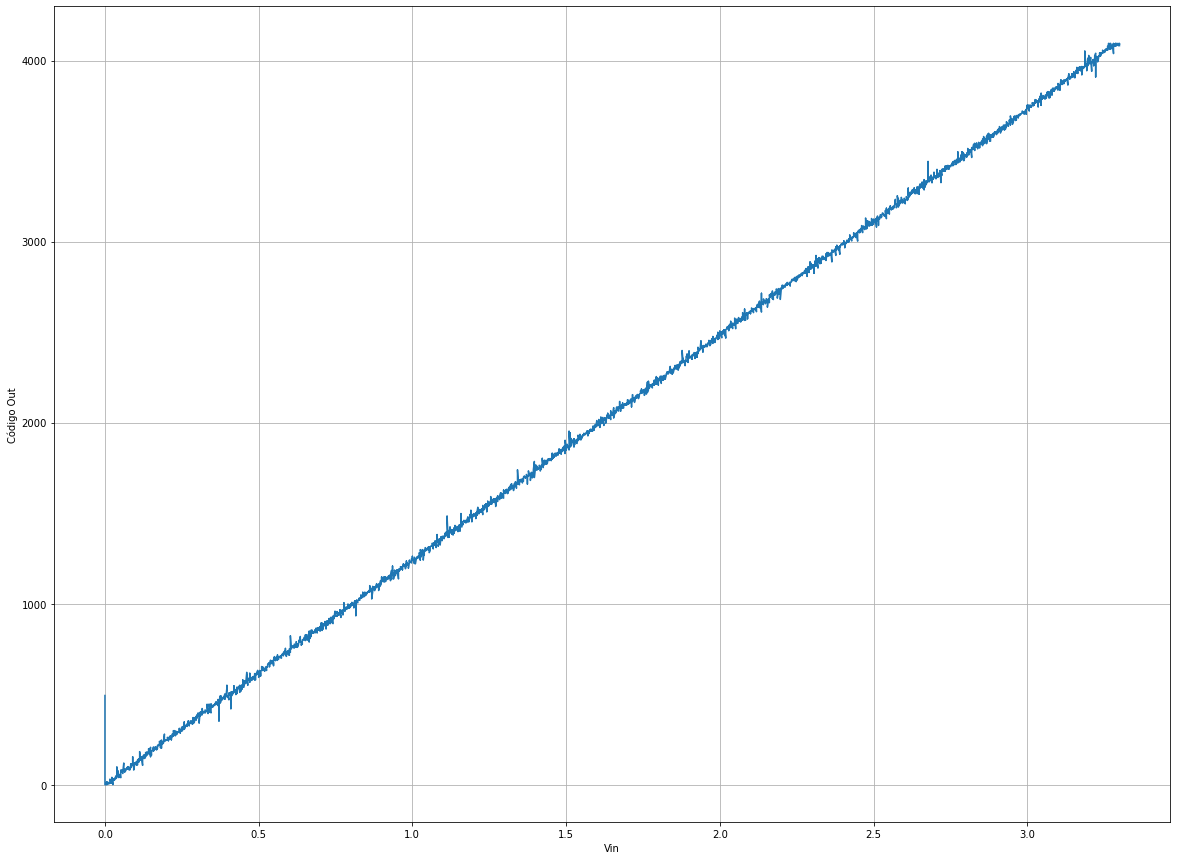

In [1]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams.update({'font.size': 22})

archivoCSV = './mediciones_adc_proyecto.csv'
#archivoCSV = '/content/drive/MyDrive/Entregas 2022/Grupo 1/Laboratorio/TP 8 - Errores ADC/mediciones_adc_2.csv'

ADC_CSV = np.genfromtxt(archivoCSV, delimiter=',')

tension_generador = ADC_CSV[:,0]
codigo_ADC = ADC_CSV[:,1]

#ploteo transferencia de ADC
plt.figure(figsize=(20, 15))
plt.plot(tension_generador,codigo_ADC)
plt.xlabel('Vin')
plt.ylabel('Código Out')
plt.grid()
plt.show()

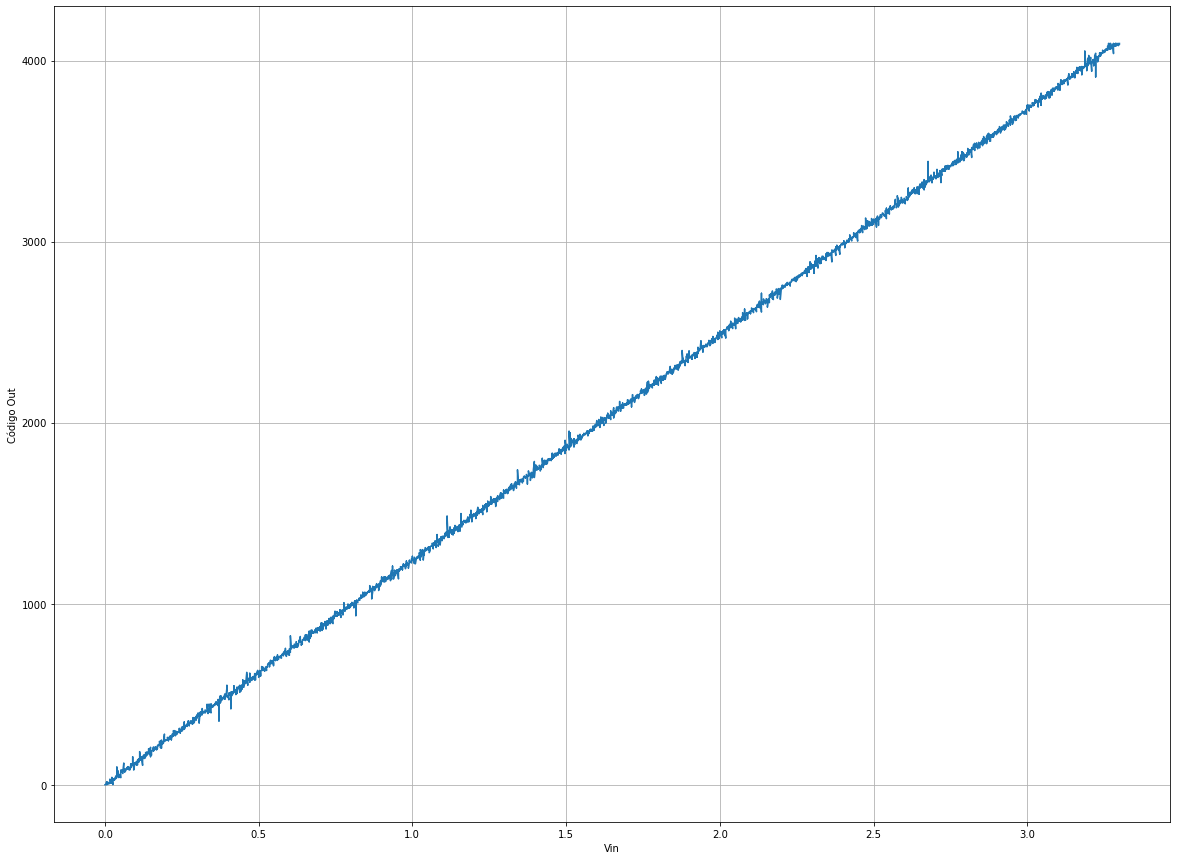

In [2]:
#Se ignoran los primeros dos puntos de la transferencia, considerados errores cometidos en el ensayo que afectarían notablemente los calculos posteriores
tension_generador = ADC_CSV[2:-1,0]
codigo_ADC = ADC_CSV[2:-1,1]

#from scipy.signal import savgol_filter

#codigo_smooth = savgol_filter(codigo_ADC, 11, 1)

#codigo_smooth = codigo_smooth.astype(int)

#nuevamente ploteo transferencia de ADC
plt.figure(figsize=(20, 15))
plt.plot(tension_generador,codigo_ADC)
plt.xlabel('Vin')
plt.ylabel('Código Out')
plt.grid()
plt.show()

# Histograma de tensiónes de entrada para cada código: intento fallido de obtener tensiones nominales analógicas de cada código

A pesar de no haber servido, lo dejamos por sentado por el esfuerzo que nos tomó realizar los algoritmos que funcionaron correctamente...

Se realizó una lista que contiene para cada código una matriz que indica la tensión de entrada que produjo dicho código en las mediciones, y cuántas veces apareció (con un máximo de 3 por tomar 3 mediciones para cada entrada).

Con dicha lista se hizo un promedio pesado con la intención de obtener la tensión nominal analógica correspondiente a cada código, y así poder calcular el DNL y el INL posteriormente.

Problema: Para cada código se produjeron se obtuvieron más de una tensión nominal analógica debido al alto ruido de entrada.

In [3]:
#Para esto hago un histograma que muestra para cáda código de salida del ADC, qué tensiones de entrada aparecen y cuántas veces aparecen (frecuencia)

#Genero matriz con primera columna siendo Vin y segunda columna siendo codigo de salida de ADC (ignorando primeras dos filas)
matriz_ADC = ADC_CSV[2:-1,:]

#Ordeno matriz de menor a mayor basandome en la columna de códigos:
matriz_ADC = matriz_ADC[matriz_ADC[:, 1].argsort()]

# #Divido la matriz general en una lista donde cada elemento sea una matriz que tenga el mismo código en la segunda columna:
# lista_codigos = list()

# chunk_matriz = np.array([[]])

# i = 0

# while i < len(tension_generador)-1:
#   codigo_actual = matriz_ADC[i, 1]
#   chunk_matriz = np.empty((0, 2))

#   while(matriz_ADC[i,1] == codigo_actual):
#     chunk_matriz = np.append(chunk_matriz,[matriz_ADC[i,:]], axis = 0)
#     i += 1
  
#   lista_codigos.append(chunk_matriz)

# #Para cada array de la lista (cada código), se debe enumerar la cantidad de veces que aparece cada tensión de entrada
# #A su vez se genera un array de codigos únicos ordenados

# lista_frecuencias_y_tensiones = list()
# codigos_ordenados_ADC = np.array([])

# for matriz_codigo in lista_codigos:
#   chunk_matriz2 = np.empty((0, 2))
#   codigos_ordenados_ADC = np.append(codigos_ordenados_ADC, matriz_codigo[0,1])

#   while matriz_codigo.any():
#     tension_actual = matriz_codigo[0,0] #siempre
  
    
#     frecuencia_valor=0
#     index_ocurrencias = np.array([], dtype=np.uint32)  #array de indices donde están los valores que coinciden con tension_actual
#     for (index,valor) in enumerate(matriz_codigo[:,0]):
#       if(valor == tension_actual):
#         frecuencia_valor+=1 #incremento la frecuencia del valor
#         index_ocurrencias = np.append(index_ocurrencias, index) #genero array de indices donde se encuentra dicho valor en matriz_codigo
    
#     matriz_codigo = np.delete(matriz_codigo, index_ocurrencias, axis = 0) #elimino las filas donde aparece el valor

#     chunk_matriz2=np.append(chunk_matriz2, [[tension_actual,frecuencia_valor]], axis = 0)

#   lista_frecuencias_y_tensiones.append(chunk_matriz2)

# #Ahora se genera un array de valores medios de tensión para cada codigo, realizando un promedio pesado por las ocurrencias de cada valor
# v_mean = np.array([])
# for matriz in lista_frecuencias_y_tensiones:
#   sumatoria_pesada = 0
#   sumatoria_ocurrencias = 0
#   for row in range(0,len(matriz[:,0])):
#     sumatoria_pesada += matriz[row,0] * matriz[row,1]
#     sumatoria_ocurrencias += matriz[row,1]
#   v_mean = np.append(v_mean, sumatoria_pesada / sumatoria_ocurrencias)



# v_mean_ordbycode = v_mean
# codigos_ordenados_ADC_ordbycode = codigos_ordenados_ADC

# # Estan ordenando y luego volviendo a ordenar por un vector ordenado!
# #v_mean = v_mean[v_mean.argsort()]
# #codigos_ordenados_ADC = codigos_ordenados_ADC[v_mean.argsort()]

# # Esa asi!
# orden = v_mean.argsort()
# v_mean = v_mean[orden]
# codigos_ordenados_ADC = codigos_ordenados_ADC[orden]

# #SE PLOTEA
# plt.figure(figsize=(20, 15))
# plt.plot(v_mean, codigos_ordenados_ADC, color='blue',label='Transferencia Real')
# plt.xlabel('Vin')
# plt.ylabel('Código Out')
# plt.grid()
# plt.legend()
# plt.show()



### Formas mas sencillas de hacer eso

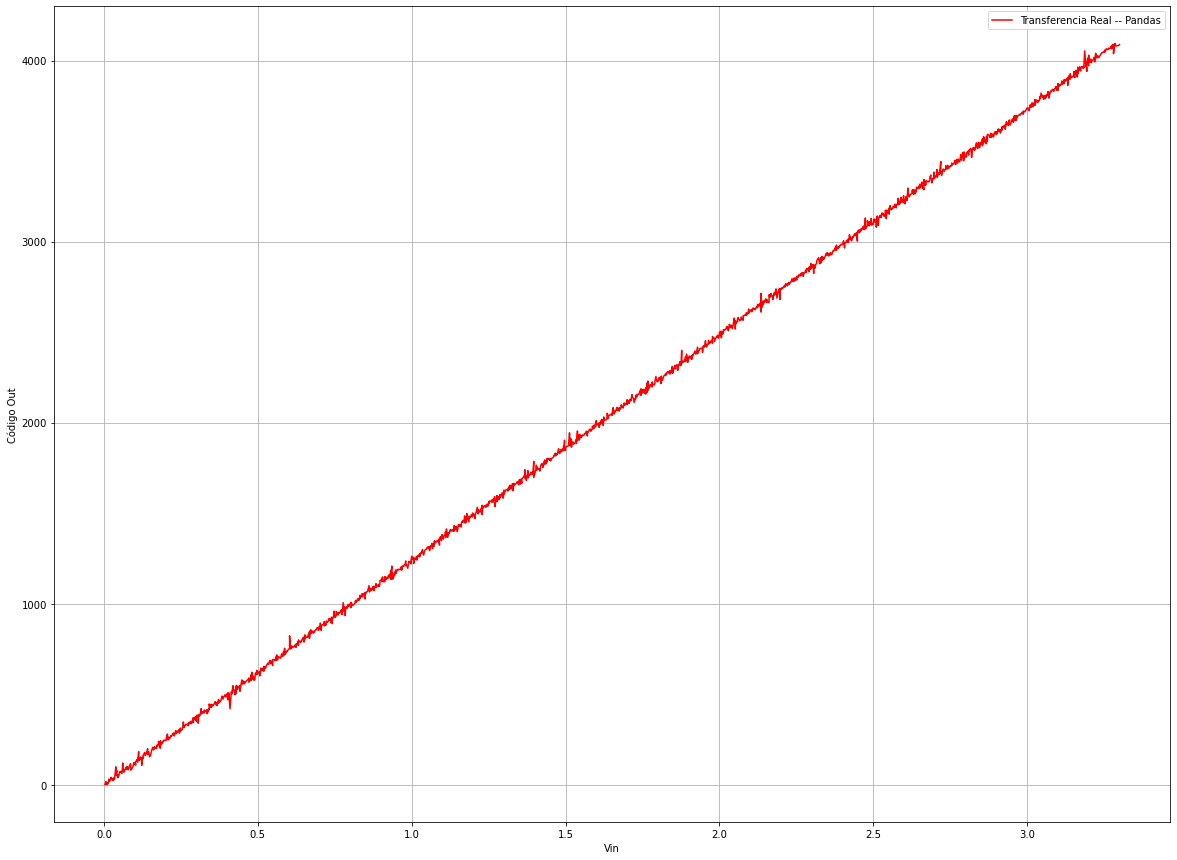

In [4]:
import pandas as pd # Congrats, you are now a datascientist!


# Armo un dataframe
meassure_df = pd.DataFrame(matriz_ADC, columns=['Tension', 'Codigo'])
# Agrupo por codigo y calculo la media
means_df = meassure_df.groupby('Codigo').mean()
#means_df = meassure_df.groupby('Codigo').agg(lambda x: pd.Series.mode(x)[0])  # Esto es la moda, el valor mas repetido 

# ----------------- Codigo para limpiar que no es necesario en realidad
## Saco cuantas cuentas por puntos tenia (auxiliar)
#counts_df = meassure_df.groupby('Codigo').count()
#means_df['Cuentas'] = counts_df['Tension'] # Las cuentas estan en la columna tension pq asi funciona el groupby
## Elimino las cuentas que no medi al menos N veces
#N = 1
#means_df = means_df.loc[means_df['Cuentas'] >= N]


# Ordeno
means_df.sort_values('Tension', inplace=True)
# Vuelvo al numpy
v_mean_2 = means_df['Tension'].values
codigos_ordenados_ADC_2 = means_df.index.values

#SE PLOTEA
plt.figure(figsize=(20, 15))
plt.plot(v_mean_2, codigos_ordenados_ADC_2, color='red',label='Transferencia Real -- Pandas')
#plt.plot(v_mean, codigos_ordenados_ADC, color='blue',label='Transferencia Real -- Metodo suyo')
plt.xlabel('Vin')
plt.ylabel('Código Out')
plt.grid()
plt.legend()
plt.show()



# Calculo DNL

In [5]:
offset = codigos_ordenados_ADC[0]

lsb_ideal  = (v_mean[-1]-v_mean[0]) / (codigos_ordenados_ADC[-1] - offset) 

DNL = np.zeros(len(v_mean))
missing_code = 0
for i in range(0,len(v_mean)-1):
  DNL[i] = np.abs((v_mean_ordbycode[i+1]- v_mean_ordbycode[i])/lsb_ideal - 1)
  if DNL[i] >1:
    missing_code+=1

print('Offset = %d códigos' %offset)
print('LSB ideal = %f v ' %lsb_ideal)
print('MAX DNL = %f codigos ' %DNL[np.argmax(DNL)])
print('Missing Codes = %d códigos ' %missing_code)

# Curva Ideal contemplando error de offset y de ganancia
#vin_ideal,step=np.linspace(v_mean[0],v_mean[-1],int(codigos_ordenados_ADC[-1]-codigos_ordenados_ADC[0]+1),retstep=True,endpoint=True)
codigos_ideal  = v_mean/lsb_ideal + offset

fig,ax = plt.subplots(2,1,constrained_layout=True,figsize=(20,20))
ax[0].plot(v_mean, codigos_ordenados_ADC, color='blue',label='Transferencia Real')
ax[0].plot(v_mean, codigos_ideal, '--', color='black',label='Transferencia Lineal (con Offset y Gain error)')

ax[0].set_xlabel('Vin')
ax[0].set_ylabel('Código Out')
ax[0].grid()
ax[0].legend()

ax[1].plot(codigos_ordenados_ADC_ordbycode,DNL , color='blue',label='DNL')
ax[1].axhline(y = 1 ,color = 'r', linestyle = '-',label='LSB Ideal')
ax[1].set_xlabel('Code')
ax[1].set_ylabel('DNL')
ax[1].grid()
ax[1].legend()

plt.show()

NameError: name 'codigos_ordenados_ADC' is not defined

# INL End-Point

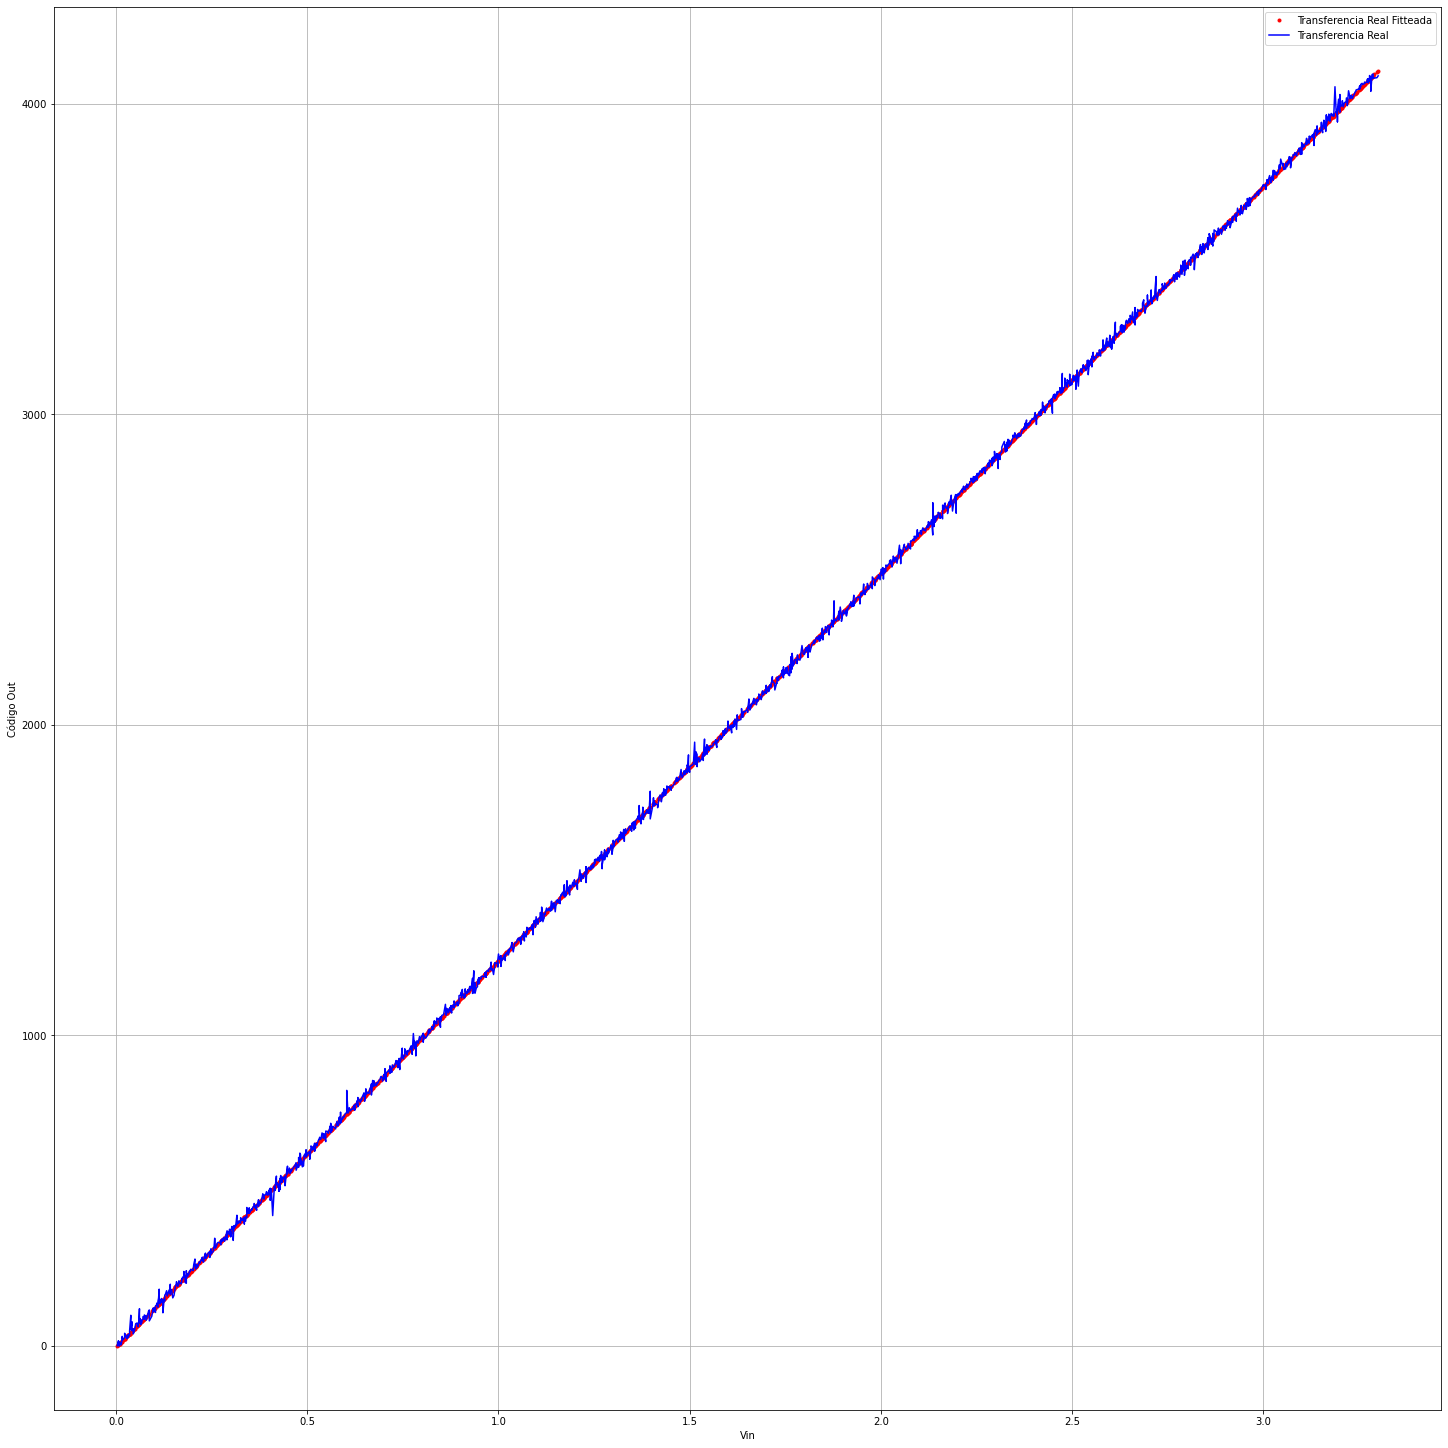

In [5]:
#Fiteo Curva
from scipy.optimize import curve_fit

# ------------------ Deben usar una recta, esto es un polinomio de grado 6...
#def objective(x, a, b, c, d,e,f,g):
#	return f+(a * x) + (b * x**2) + (c * x**3) + (d * x**4)+(e * x**5)+(g * x**6)

#popt, _ = curve_fit(objective, v_mean, codigos_ordenados_ADC)

#a, b, c, d,e,f,g = popt

#y_line = objective(v_mean, a, b, c, d, e, f, g)

#y_line = y_line.astype(int)

def objective(x, a, b):
	return (a * x) + b

popt, _ = curve_fit(objective, v_mean_2, codigos_ordenados_ADC_2)

a, b = popt

y_line = objective(v_mean_2, a, b)

y_line = (y_line+0.5).astype(int)


# Estos son los codigos fiteados por la mejor recta
codigos_ideal_fit  = y_line
# Codigos, pero para las tensiones ordenadas por codigo
#codigos_ideal_fit  = objective(v_mean_ordbycode, a, b).astype(int)

# #Calculo de INL
# INL_metodo1 = np.zeros(len(v_mean))
# INL_metodo2 = np.zeros(len(v_mean))

# #Fórmula de la nota de aplicación:
# for i in range(0,len(v_mean)-1):
#   INL_metodo1[i] = np.abs((v_mean_ordbycode[i]- v_mean_ordbycode[0])/lsb_ideal - codigos_ordenados_ADC_ordbycode[i]) 
  
#PROBLEMA: Al no tener V_ZERO (porque nunca llegamos a que el ADC tenga 0 en el código de salida).

# #Por esta razón, se realiza un segundo método: una resta punto a punto entre la transferencia real y la lineal que contempla offset y gain error
# for i in range(0,len(codigos_ordenados_ADC)-1):
#   #INL_metodo2[i] = np.abs(codigos_ordenados_ADC[i] - codigos_ideal[i]) # Estos son los codigos solo corrigiendo offset y ganancia
#   INL_metodo2[i] = np.abs(codigos_ordenados_ADC_ordbycode[i] - codigos_ideal_fit[i])
  

# ploteo fiteo, y transferencia ideal (contemplando Offset y error de ganancia)
fig,ax = plt.subplots(1,1,constrained_layout=True,figsize=(20,20))
ax.plot(v_mean_2, y_line,'.', color='red',label='Transferencia Real Fitteada')
ax.plot(v_mean_2, codigos_ordenados_ADC_2,color='blue',label = 'Transferencia Real')
#ax.plot(v_mean, codigos_ideal, '--', color='black',label='Transferencia Lineal (con Offset y Gain error)')
ax.set_xlabel('Vin')
ax.set_ylabel('Código Out')
ax.grid()
ax.legend()

# #ax[1].plot(codigos_ordenados_ADC_ordbycode,INL_metodo1 , color='blue',label='INL_Método1')
# ax[1].plot(codigos_ordenados_ADC_ordbycode,INL_metodo2 , color='red',label='INL')
# ax[1].set_xlabel('Code')
# ax[1].set_ylabel('INL')
# ax[1].grid()
# ax[1].legend()
plt.show()

#print('MAX INL = %f codigos ' %INL_metodo2[np.argmax(INL_metodo2)])

In [11]:
#Elimino puntos repetidos de la curva lineal fiteada y genero archivos de texto con vector de códigos y vector de tensiones

f = open("transferenciaADC.csv", "w+")
f_cod = open("codigosADC.csv", "w+")
f_vin = open("tensionIn_ADC.csv", "w+")

for index in range(0,len(y_line)):
    if index == len(y_line)-1:
        f.write(str(y_line[index]) + ",")
        f.write(str(v_mean_2[index]) + "\n")
        f_cod.write(str(y_line[index]) + ",\n")
        f_vin.write(str(v_mean_2[index]) + ",\n")
    elif y_line[index] != y_line[index+1] :
        f.write(str(y_line[index]) + ",")
        f.write(str(v_mean_2[index]) + "\n")
        f_cod.write(str(y_line[index]) + ",\n")
        f_vin.write(str(v_mean_2[index]) + ",\n")
f.close()
f_cod.close()
f_vin.close()